In [1]:
# Check nucleotide quantity
# Encoding (phy-chem)
# Reducir la dimensionalidad y plotear el 2-D

In [2]:
import pandas as pd
from eda_functions import *

import matplotlib.pyplot as plt

# 1.Load and explore the dataset

In [3]:
df_seqs, df_labels = load_data()

Check sequences dataframe head and tail

In [4]:
df_seqs.head()

,0
0,ñññ
1,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
2,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
3,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
4,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...


In [5]:
df_seqs.tail()

,0
1996,GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...
1997,GTTCGCAGCGTATTGAGTAATGTTTGACTCGACCGAACTCCATATT...
1998,ACTCGCTGTCCACGTCTATTCCTAGGGGTTTTATTTCGCAAGGTGA...
1999,TGCAAAGGGGCGACCGAACTCCCTTTACCGCGGAGTTATTCATAAT...
2000,AATGTCGACCGAACTCCGCACTGCTGGCCCGGGCCTATATCGAGAG...


In [6]:
df_labels

,0
0,-
1,0
2,0
3,0
4,1
...,...
1996,0
1997,1
1998,0
1999,1


In [7]:
# Filter the df just in case it contains non dna strings
df_seqs_clean = drop_non_dna(df_seqs)

In [8]:
df_labels_clean = df_labels.iloc[df_seqs_clean.index]

In [9]:
# Check if some sequences were removed
print(f'Number of non DNA sequences removed: {len(df_seqs)-len(df_seqs_clean)}')

Number of non DNA sequences removed: 1


In [10]:
# Validate that all sequences are DNA sequences
print(f'All sequences are DNA sequences?:{sum(df_seqs_clean[0].apply(check_is_dna))==len(df_seqs_clean)}')

All sequences are DNA sequences?:True


In [11]:
# Check class balance
df_labels_clean[0].value_counts()

0    1013
1     987
Name: 0, dtype: int64

We have approximately have the same amount of protein binding DNA sequences (Class 1) and non-binding DNA sequences (Class 0).

In [12]:
# Check all sequences have the same length (padding?)
seqs_len = df_seqs_clean[0].apply(len)
print(f'All sequences have the same length? {len(set(seqs_len))==1}')

All sequences have the same length? True


In [13]:
# Check sequences length
print(f'Sequences are {seqs_len.values[0]} nucleotides long.')

Sequences are 50 nucleotides long.


Now let's check the nucleotide frequencies of ocurrence for each type of sequences

In [14]:
df_seqs_clean[1] = df_labels_clean[0]

In [15]:
df_seqs_clean.loc[df_labels_clean[df_labels_clean[0]=='0'].index,:]

,0,1
1,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...,0
2,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...,0
3,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...,0
8,AGGCAGGTGGTCGTACAATGTTTTCGAAGAGATAGGGGGCCAGAGG...,0
9,TACTGCCTATAGCGAAGAGCGCGAGAGGTATATCGAAGAATACCGA...,0
...,...,...
1987,GGGCTGCGACGCTCTGAGGTGCTACAGAGCCTCGTGATGGCTGCAT...,0
1994,GGCATTGATACTCGGACGGTTTTACATCGTCCTATCAAAACCTCTG...,0
1995,TAAAGGCTCCTTTCGTAGGGGTCAACCGTAGGTACGAAGATATGAT...,0
1996,GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...,0


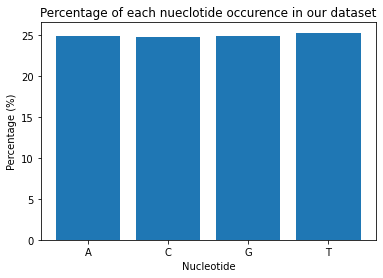

In [16]:
# Add a column for labels
df_seqs_clean[1] = df_labels_clean[0].astype(int)

# Plot nucleotides distribution of non-binding sequences
plot_nucleotides(df_seqs_clean[df_seqs_clean[1]==0])

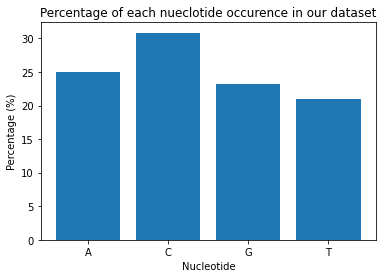

In [17]:
# Plot nucleotides distribution of binding sequences
plot_nucleotides(df_seqs_clean[df_seqs_clean[1]==1])

Encode sequences using pairs Thermodynamic properties' (enthalpies):

In [18]:
# Load df of equivalences
df_enc = pd.read_csv('data/encoding.txt')
df_enc.head()

,Pair,Encoding
0,TC,5.6
1,GA,5.6
2,CA,5.8
3,TG,5.8
4,TA,6.0


In [19]:
# Split sequences into pairs and encode it
df_seqs_clean[0]

1       CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
2       GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
3       GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
4       GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
5       GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
                              ...                        
1996    GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...
1997    GTTCGCAGCGTATTGAGTAATGTTTGACTCGACCGAACTCCATATT...
1998    ACTCGCTGTCCACGTCTATTCCTAGGGGTTTTATTTCGCAAGGTGA...
1999    TGCAAAGGGGCGACCGAACTCCCTTTACCGCGGAGTTATTCATAAT...
2000    AATGTCGACCGAACTCCGCACTGCTGGCCCGGGCCTATATCGAGAG...
Name: 0, Length: 2000, dtype: object

In [22]:
import re
ls_pairs = re.findall('..','TCGCGCGGGTGCGGAGGATGAGTCGCAG')
ls_pairs_enc = [df_enc[df_enc.Pair==pair].Encoding.values[0] for pair in ls_pairs]
ls_pairs_enc

[5.6, 11.1, 11.1, 11.0, 6.5, 11.1, 11.0, 7.8, 5.6, 5.8, 7.8, 5.6, 11.1, 7.8]